yt : [INFO     ] 2024-11-27 11:06:03,895 Parameters: current_time              = 11.925285011256845 Gyr
yt : [INFO     ] 2024-11-27 11:06:03,896 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-11-27 11:06:03,897 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-11-27 11:06:03,897 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-11-27 11:06:03,898 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-11-27 11:06:03,899 Parameters: current_redshift          = 0.14255728632206321
yt : [INFO     ] 2024-11-27 11:06:03,899 Parameters: omega_lambda              = 0.723999977111816
yt : [INFO     ] 2024-11-27 11:06:03,900 Parameters: omega_matter              = 0.276000022888184
yt : [INFO     ] 2024-11-27 11:06:03,900 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-11-27 11:06:03,901 Parameters: hubble_constant           = 0.703000030517578
yt : [WARNING  ] 2024-11-27 11:06:03,905 Detected 2


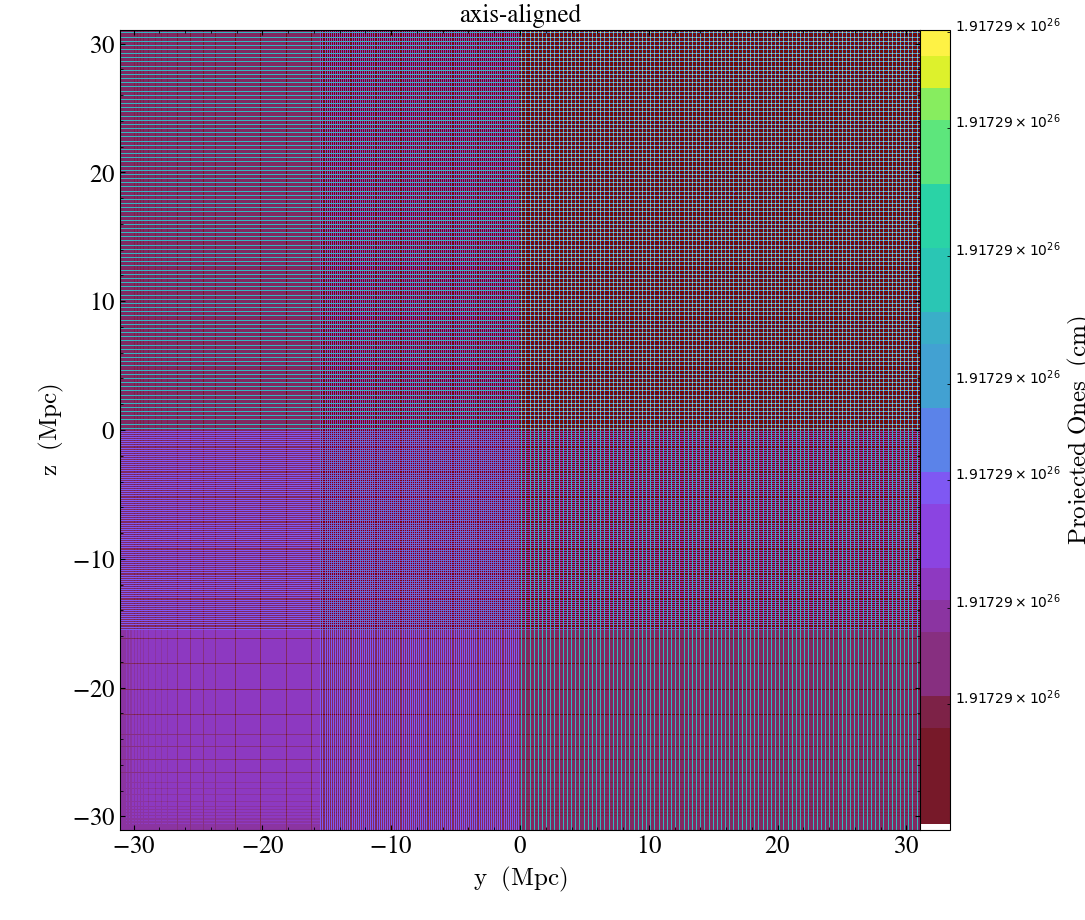

yt : [INFO     ] 2024-11-27 11:06:05,581 xlim = -0.500000 0.500000
yt : [INFO     ] 2024-11-27 11:06:05,641 ylim = -0.500000 0.500000
yt : [INFO     ] 2024-11-27 11:06:05,641 zlim = -0.883346 0.883346
yt : [INFO     ] 2024-11-27 11:06:05,642 Making a fixed resolution buffer of (('index', 'ones')) 800 by 800
yt : [INFO     ] 2024-11-27 11:06:05,709 Identified    16/   16 intersecting domains (   16 through hilbert key indexing)



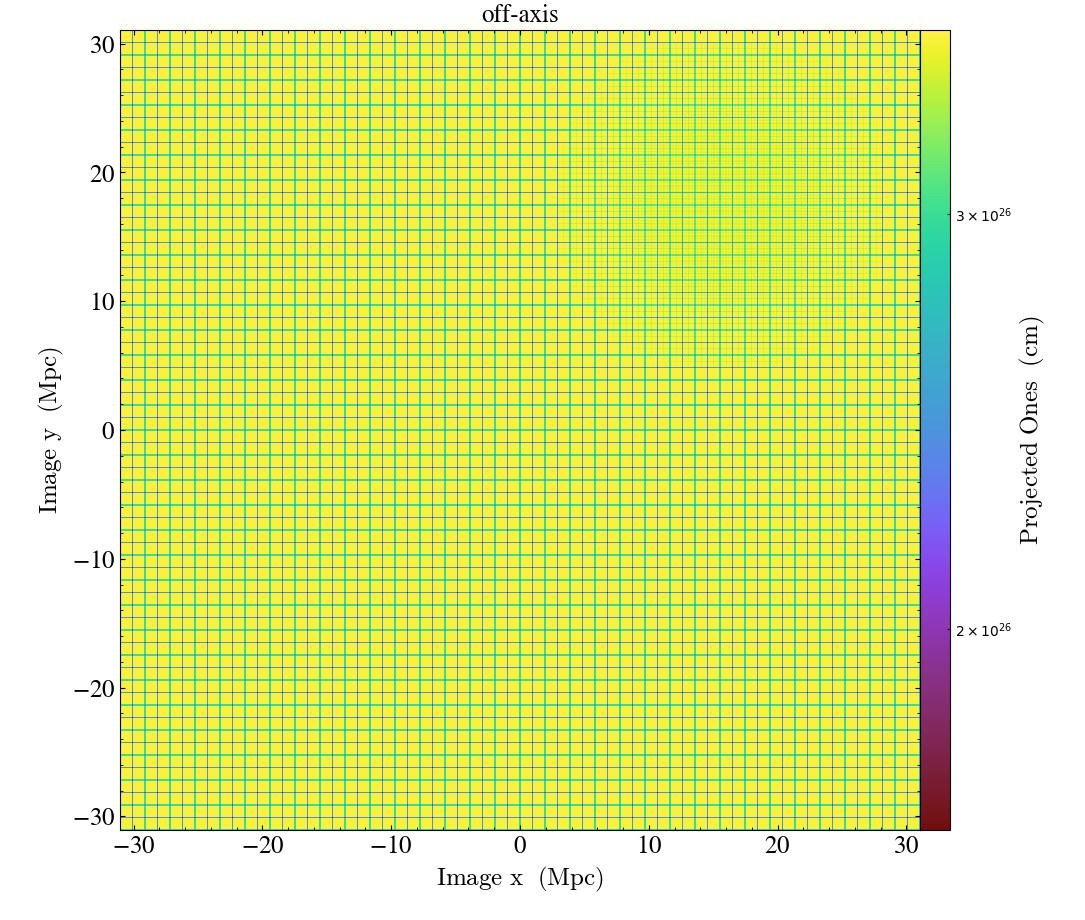

Text(0.5, 0, 'ratio (aligned / off axis)  of projected ones')

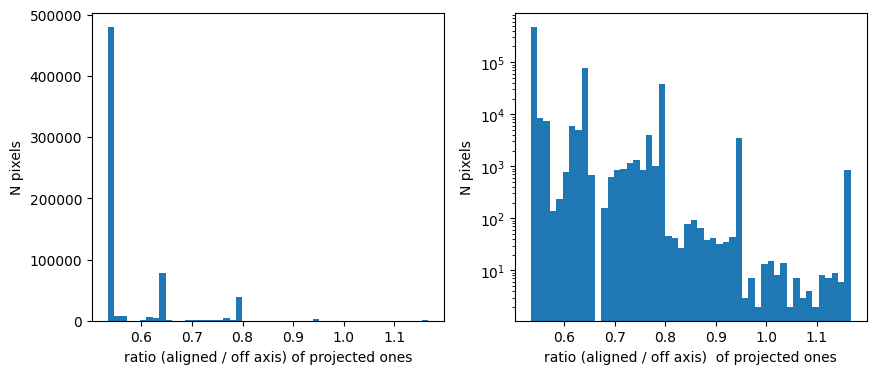

In [2]:
import numpy as np
import yt
import matplotlib.pyplot as plt
ds = yt.load("output_00080")

fld = ('index', 'ones')
bs = (800, 800)
wid = 1.
p1 = yt.ProjectionPlot(
    ds,
    "x",
    fld,
    center=[0.5] * 3,
    width=wid,
    weight_field=None,
    #weight_field=("gas", "density"),
    buff_size = bs
)
p1.annotate_title("axis-aligned")
p1.show()

p2 = yt.OffAxisProjectionPlot(
    ds, 
    [1, 0, 0], 
    fld, 
    center=[0.5] * 3,
    width=wid,
    weight_field=None,   
    buff_size = bs
    #weight_field=("gas", "density"),    
)   
p2.annotate_title("off-axis")
p2.show() 

f, axs = plt.subplots(ncols=2,nrows=1,figsize=(10,4))
frb_vals2 = p2.frb['index','ones']
frb_vals1 = p1.frb['index','ones']
_ = axs[0].hist(frb_vals1.d.ravel() / frb_vals2.d.ravel(), bins=50)
_ = axs[1].hist(frb_vals1.d.ravel() / frb_vals2.d.ravel(), bins=50)
axs[1].set_yscale('log')
axs[0].set_ylabel('N pixels')
axs[1].set_ylabel('N pixels')
axs[0].set_xlabel('ratio (aligned / off axis) of projected ones')
axs[1].set_xlabel('ratio (aligned / off axis)  of projected ones')

expectation is that projecting 'ones' across the whole domain should nominally return a length equal to the domain width:

In [4]:
ds.domain_width.to('cm')

unyt_array([1.91728808e+26, 1.91728808e+26, 1.91728808e+26], 'cm')

In [5]:
frb_vals1.mean()

unyt_quantity(1.91728808e+26, 'cm')

In [6]:
frb_vals2.mean(), np.median(frb_vals2)

(unyt_quantity(3.38725717e+26, 'cm'), unyt_quantity(3.56846846e+26, 'cm'))